# EDA

In [1]:
from fastai.vision import *
from matplotlib.pyplot import figure
from fastai.callbacks import * 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/home/jupyter/tutorials/data/test925/filename.csv')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


(0, 1000)

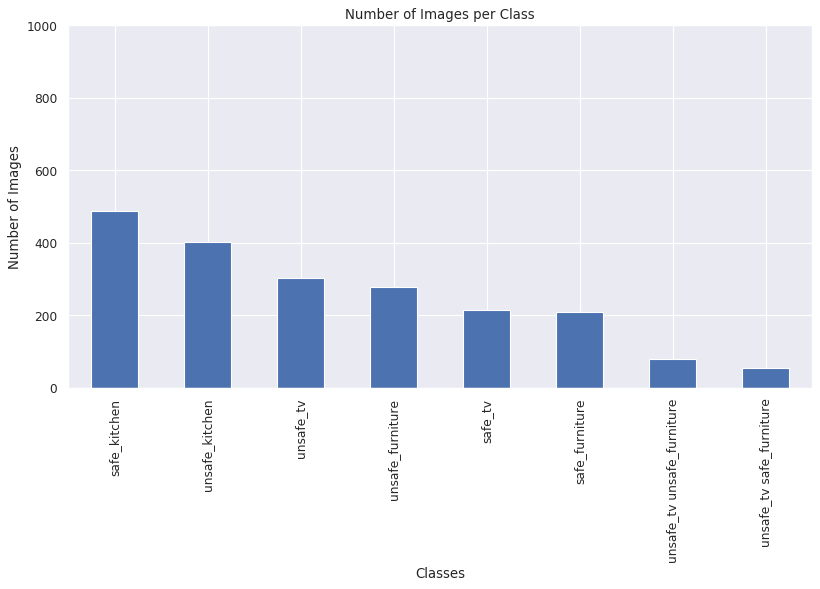

In [3]:
sns.set()
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Number of Images per Class')
plt.ylabel('Number of Images')
plt.xlabel('Classes')
df.tags.value_counts().plot.bar()
axes = plt.axes()
axes.set_ylim([0, 1000])

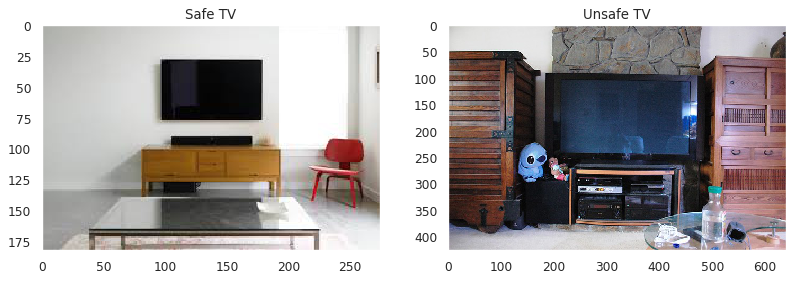

In [9]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.grid(False)

img = plt.imread('/home/jupyter/tutorials/data/test925/safe_tv  (12).jpeg') ; plt.imshow(img)
plt.title('Safe TV')
plt.subplot(1,2,2)
img_1 = plt.imread('/home/jupyter/tutorials/data/test925/unsafe_tv (194).jpg') ; plt.imshow(img_1)
plt.title('Unsafe TV')
plt.grid(False)


Text(0.5, 1.0, 'Unsafe furniture')

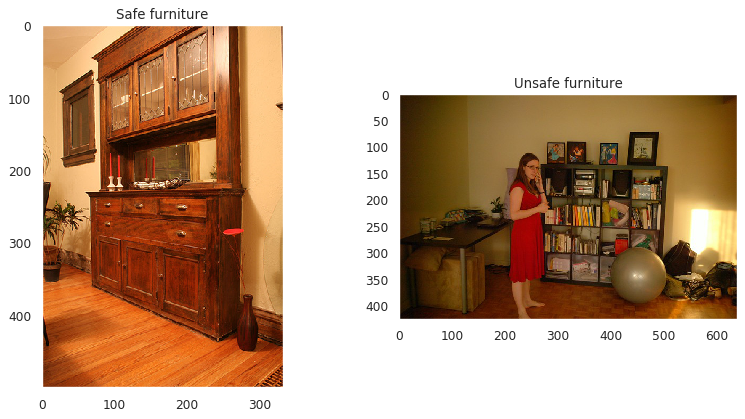

In [11]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.grid(False)

img = plt.imread('/home/jupyter/tutorials/data/test925/safe_furniture  (35).JPEG') ; plt.imshow(img)
plt.title('Safe furniture')
plt.subplot(1,2,2)
plt.grid(False)

img_1 = plt.imread('/home/jupyter/tutorials/data/test925/unsafe_furniture (100).jpg') ; plt.imshow(img_1)
plt.title('Unsafe furniture')

Text(0.5, 1.0, 'Unsafe kitchen')

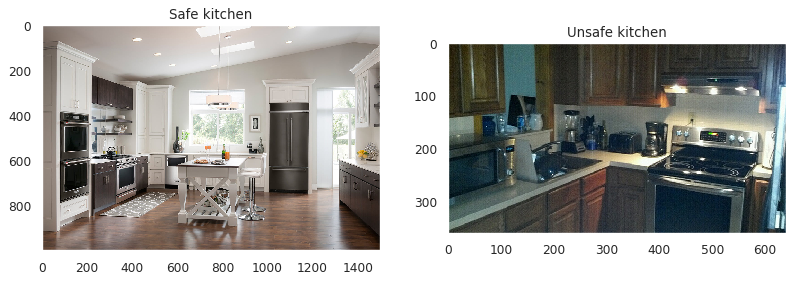

In [13]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(1,2,1)
plt.grid(False)

img = plt.imread('/home/jupyter/tutorials/data/test925/safe_kitchen (201).jpg') ; plt.imshow(img)
plt.title('Safe kitchen')
plt.subplot(1,2,2)
plt.grid(False)

img_1 = plt.imread('/home/jupyter/tutorials/data/test925/unsafe_kitchen (98).jpg') ; plt.imshow(img_1)
plt.title('Unsafe kitchen')

Text(0.5, 1.0, 'unsafe_tv safe_furniture')

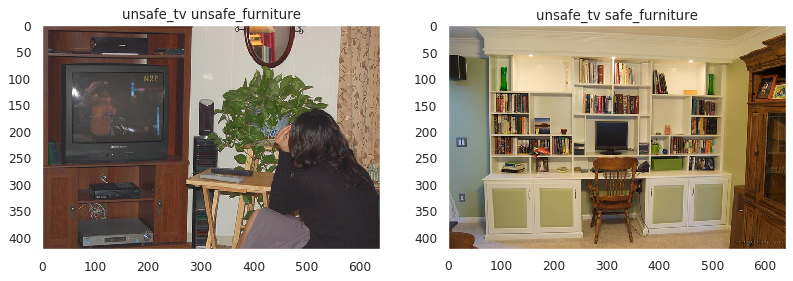

In [14]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.grid(False)
img = plt.imread('/home/jupyter/tutorials/data/test925/unsafe_tv unsafe_furniture (63).jpg') ; plt.imshow(img)
plt.title('unsafe_tv unsafe_furniture')
plt.subplot(1,2,2)
plt.grid(False)
img_1 = plt.imread('/home/jupyter/tutorials/data/test925/unsafe_tv safe_furniture  (26).jpg') ; plt.imshow(img_1)
plt.title('unsafe_tv safe_furniture')

# Modeling 

In [2]:
tfms = get_transforms(max_zoom=1.3,max_warp=0.4, max_lighting= 0.4)


In [3]:
np.random.seed(369)
src = (ImageList.from_csv('/home/jupyter/tutorials/data/test925','filename.csv')
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=' '))

In [4]:
data = (src.transform(tfms,size=256)
        .databunch().normalize(imagenet_stats))

In [48]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)

In [49]:
learn = cnn_learner(data, models.resnet34, metrics=[acc_02, f_score])

In [20]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


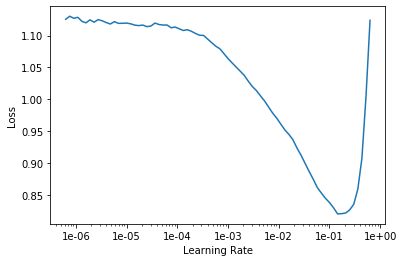

In [8]:
learn.recorder.plot()

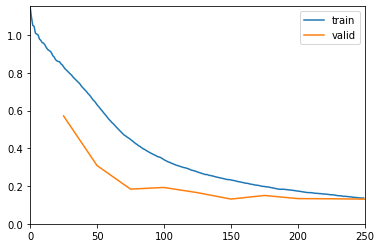

Better model found at epoch 0 with valid_loss value: 0.5712267756462097.
Better model found at epoch 1 with valid_loss value: 0.3086273968219757.
Better model found at epoch 2 with valid_loss value: 0.1837843358516693.
Better model found at epoch 4 with valid_loss value: 0.16497297585010529.
Better model found at epoch 5 with valid_loss value: 0.13099031150341034.
Better model found at epoch 9 with valid_loss value: 0.1308002769947052.


In [21]:
learn.fit_one_cycle(10,8e-03,callbacks=[ShowGraph(learn),SaveModelCallback(learn)])

In [23]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


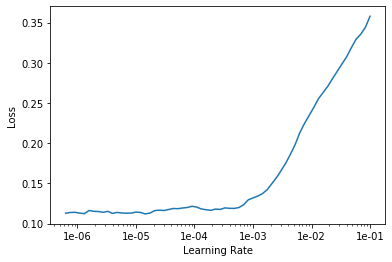

In [24]:
learn.lr_find()
learn.recorder.plot()

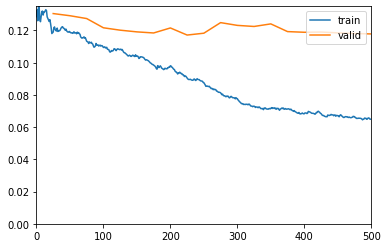

Better model found at epoch 0 with valid_loss value: 0.13047733902931213.
Better model found at epoch 1 with valid_loss value: 0.1291375607252121.
Better model found at epoch 2 with valid_loss value: 0.12738341093063354.
Better model found at epoch 3 with valid_loss value: 0.12165412306785583.
Better model found at epoch 4 with valid_loss value: 0.12017112225294113.
Better model found at epoch 5 with valid_loss value: 0.11911530047655106.
Better model found at epoch 6 with valid_loss value: 0.11843650788068771.
Better model found at epoch 8 with valid_loss value: 0.11714449524879456.


In [25]:
learn.fit_one_cycle(20,2e-05,callbacks=[ShowGraph(learn),SaveModelCallback(learn)])

In [50]:
learn.load('/home/jupyter/experiments/exp1-recheck')

Learner(data=ImageDataBunch;

Train: LabelList (1621 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: MultiCategoryList
safe_furniture,safe_furniture,safe_furniture,safe_furniture,safe_furniture
Path: /home/jupyter/tutorials/data/test925;

Valid: LabelList (405 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: MultiCategoryList
safe_furniture,unsafe_tv,safe_tv,safe_tv,unsafe_kitchen
Path: /home/jupyter/tutorials/data/test925;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_siz

In [42]:
del learn
gc.collect()

32988

# just for the purpose of grad cam we trained our data on multi-classifier.

In [29]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy])

In [30]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


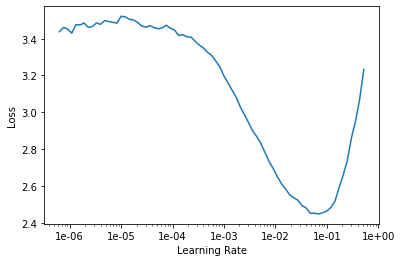

In [32]:
learn.recorder.plot()

In [33]:
learn.fit_one_cycle(10,1e-03)

In [34]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


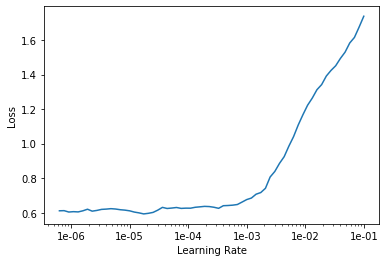

In [35]:
learn.lr_find()
learn.recorder.plot()

In [37]:
learn.fit_one_cycle(20,slice(3e-06,3e-05))

In [38]:
interp = ClassificationInterpretation.from_learner(learn,tta=True)


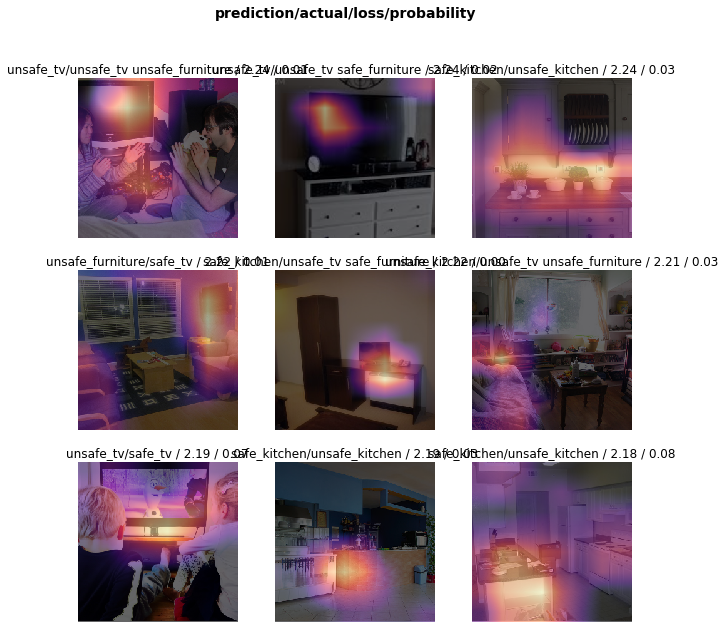

In [57]:
losses,idxs = interp.top_losses()
interp.plot_top_losses(9, figsize=(10,10),heatmap=True)

# plotting prediction results from best multi-label model

In [ ]:
del learn
gc.collect()
learn = cnn_learner(data, models.resnet34, metrics=[acc_02, f_score])
learn.load('/home/jupyter/experiments/exp1-recheck')

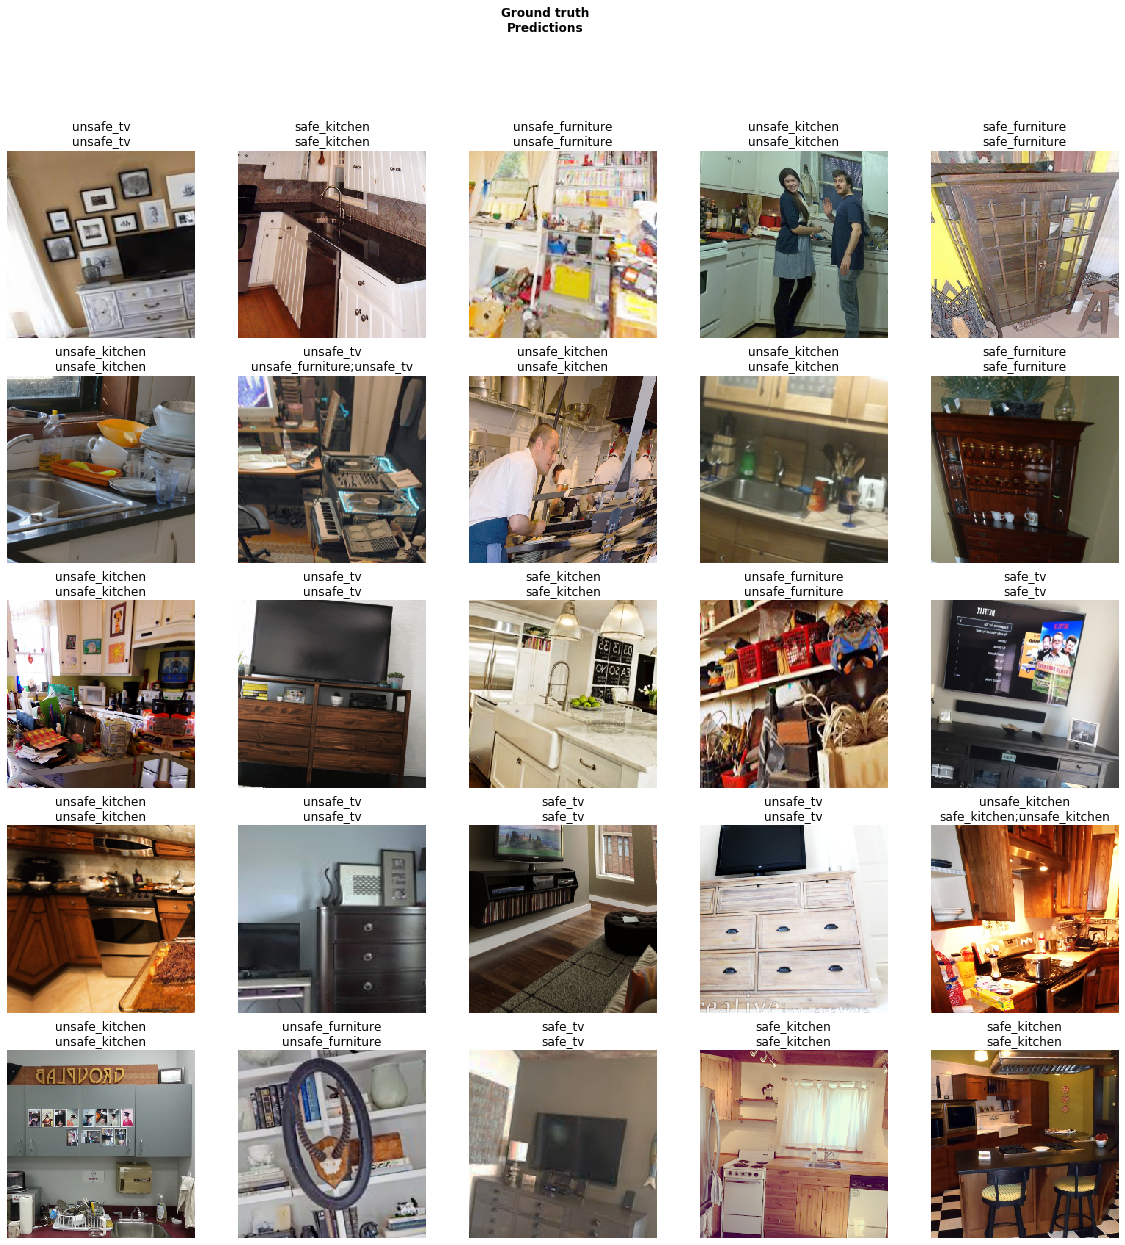

In [51]:
learn.show_results(ds_type=DatasetType.Train)


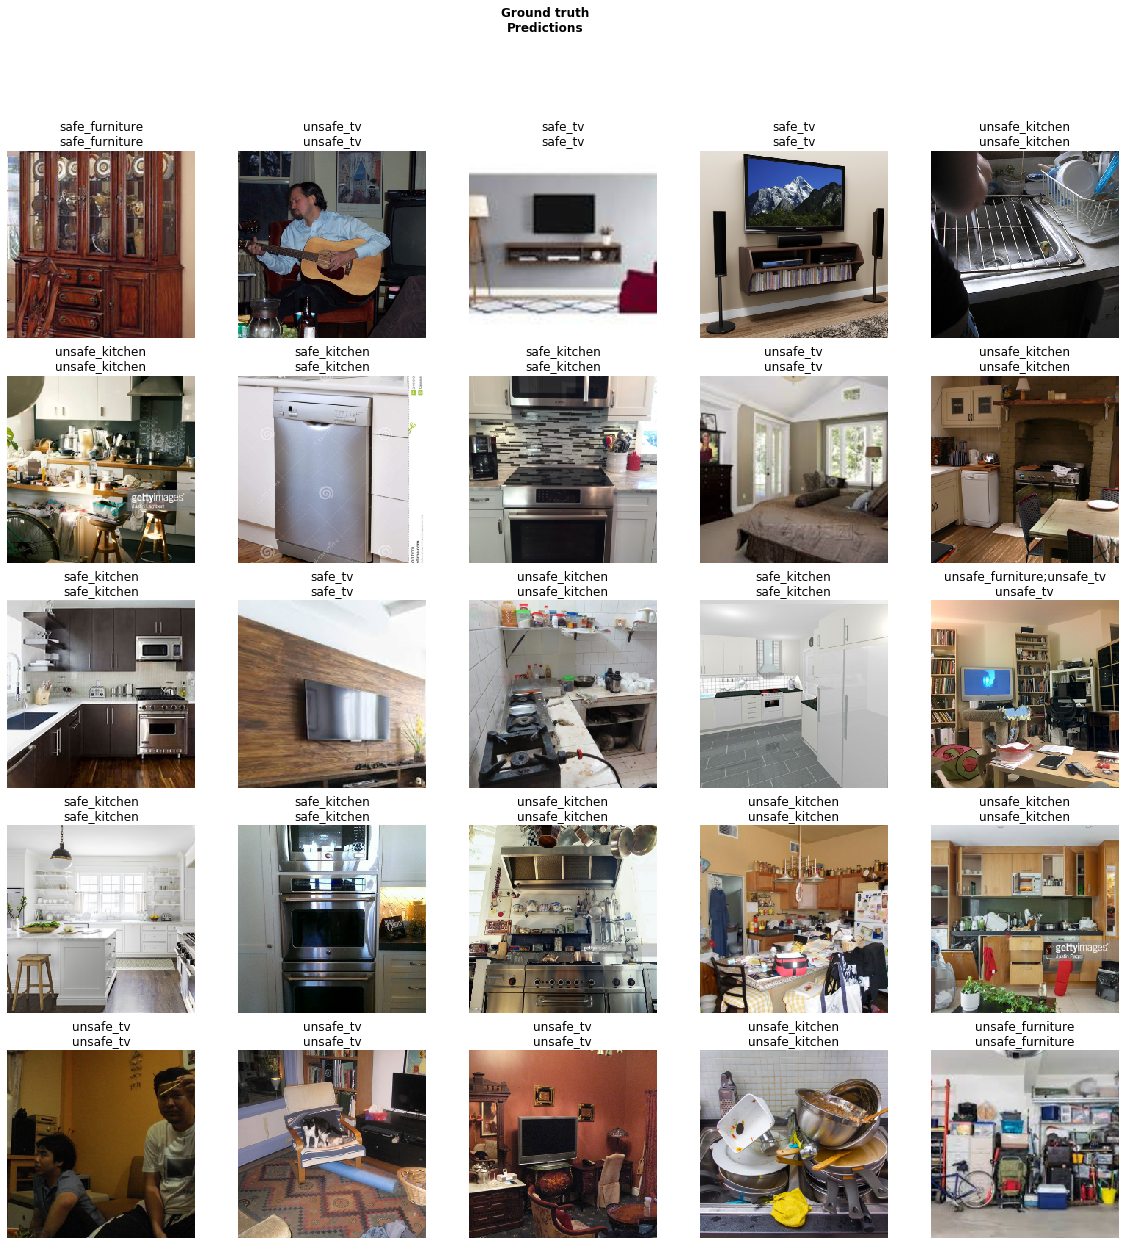

In [52]:
learn.show_results()
